In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import mctspy as mct

In [3]:
model = mct.f12model (v1=2*(np.sqrt(2)-1) - 1e-3/(np.sqrt(2)-1), v2=2)

In [4]:
phi = mct.correlator (model=model, store=True)

In [5]:
correlators = mct.CorrelatorStack([phi])

In [6]:
model_s = mct.sjoegren_model(vs=30, base_model=model)
phi_s = mct.correlator (model=model_s, base=phi, store=True)
correlators.append(phi_s)

In [7]:
correlators.solve_all()

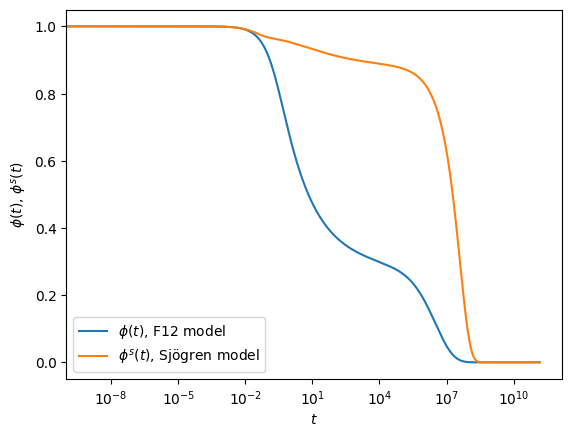

In [8]:
plt.plot(phi.t, phi.phi, label=r'$\phi(t)$, F12 model')
plt.plot(phi_s.t, phi_s.phi, label=r'$\phi^s(t)$, Sjögren model')
plt.xscale('log')
plt.xlabel(r'$t$')
plt.ylabel(r'$\phi(t)$, $\phi^s(t)$')
plt.legend()
plt.show()

In [9]:
def FT (f, t, w):
    t_, w_ = np.meshgrid (t, w)
    f_ = np.tile(f, w.shape[0]).reshape(w.shape[0],-1)
    fwre = mct.util.filon_cos_transform(f_, t_, w_)
    fwim = mct.util.filon_sin_transform(f_, t_, w_)
    return fwre + 1j*fwim

In [10]:
w = 10**np.linspace(-10,2,200)
phi_w = FT (phi.phi[:,0], phi.t, w)
phi_s_w = FT (phi_s.phi[:,0], phi_s.t, w)

In [11]:
chi = 1j*w*phi_w
chi_s = 1j*w*phi_s_w

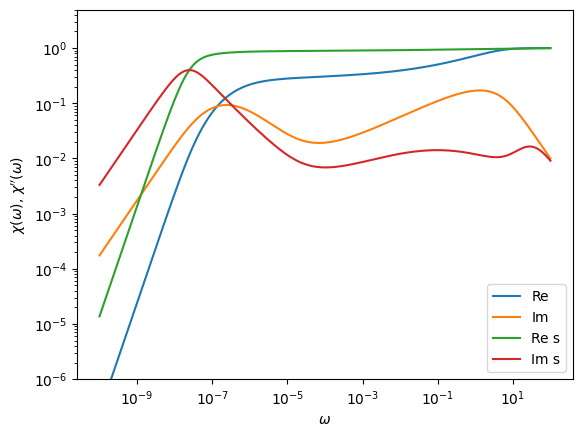

In [12]:
plt.plot(w, -chi.real, label='Re')
plt.plot(w, chi.imag, label='Im')
plt.plot(w, -chi_s.real, label='Re s')
plt.plot(w, chi_s.imag, label='Im s')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\omega$')
plt.ylabel(r"$\chi(\omega)$, $\chi''(\omega)$")
plt.ylim(1e-6,5)
plt.legend()
plt.show()

In [13]:
m_w = FT (phi.m[:,0], phi.t, w)

In [14]:
phi_from_m = (m_w+1)/(-1j*w*(1+m_w)+1)

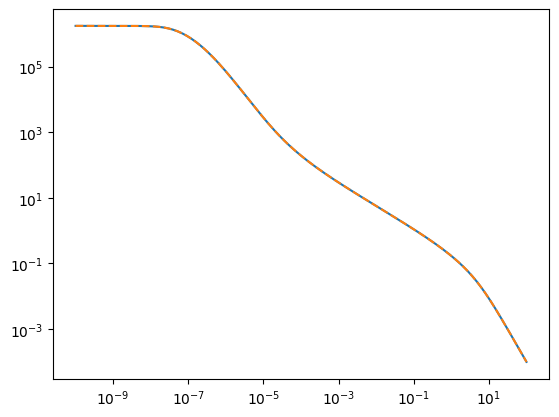

In [15]:
plt.plot(w, phi_w.real)
plt.plot(w, phi_from_m.real, linestyle='dashed')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [16]:
m_from_phi = -1+phi_w/(1+1j*w*phi_w)

In [17]:
df = np.gradient(phi.phi[:,0], phi.t)
dphi_w = FT(df, phi.t, w)
m_from_phi_dphi = -1 - phi_w/dphi_w

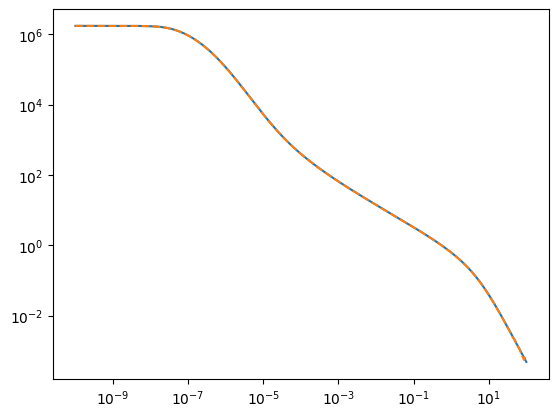

In [18]:
plt.plot(w, m_w.real)
plt.plot(w, m_from_phi.real, linestyle='dashed')
plt.xscale('log')
plt.yscale('log')
plt.show()

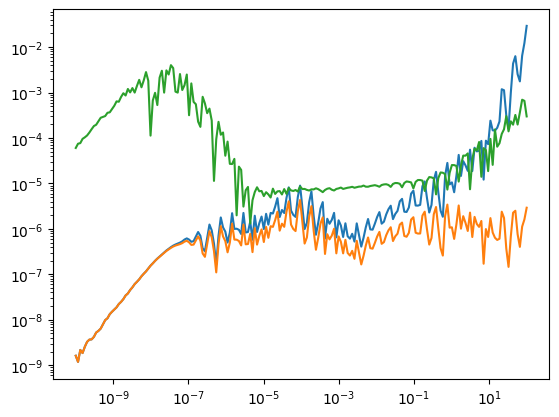

In [19]:
plt.plot(w,np.abs(m_w-m_from_phi)*w)
plt.plot(w,np.abs(phi_w-phi_from_m)*w)
plt.plot(w,np.abs(m_w-m_from_phi_dphi)*w)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [20]:
nrange=np.arange(1,5)
f1model = {}
for n in nrange:
    f1model[-n] = mct.f12model(1.0-10.**-n, 0.0)
    f1model[n] = mct.f12model(1.0+10.**-n, 0.0)

In [21]:
correlators = mct.CorrelatorStack()
for n in f1model:
    correlators.append(mct.correlator (model=f1model[n], blocks=50, maxiter=1000000, blocksize=512, accuracy=1e-12, store=True))
correlators.solve_all()

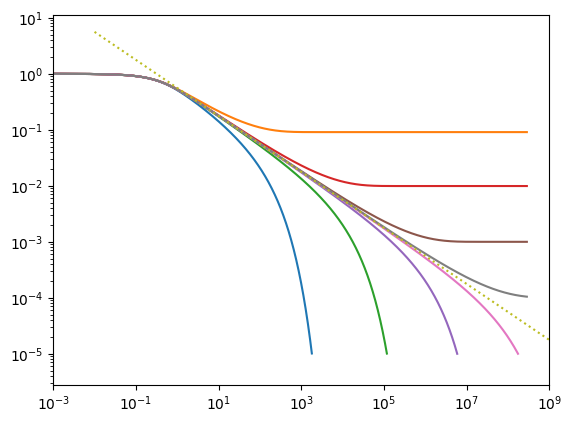

In [22]:
for phi in correlators:
    mask = phi.phi[:,0]>=1e-5
    plt.plot(phi.t[mask], phi.phi[:,0][mask])
trange = 10**np.linspace(-2,10,10)
plt.plot(trange, (trange/0.314)**-0.5, linestyle='dotted')
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e-3,1e9)
plt.show()